In [35]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
plt.style.use('dark_background')
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (10,8)

In [36]:
pkl_file = open('train.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()

## Clustering, KMEANS

In [37]:
data_cluster = data[['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
                           'Replant Risk_mean','harvest_mean']]

In [38]:
#scale dataset
scale_norm = StandardScaler()
scale_norm.fit(data_cluster)
scale_data = scale_norm.transform(data_cluster)

In [39]:
#save scale_norm for testing
pickle.dump(scale_norm, open('scaler.pkl','wb'))

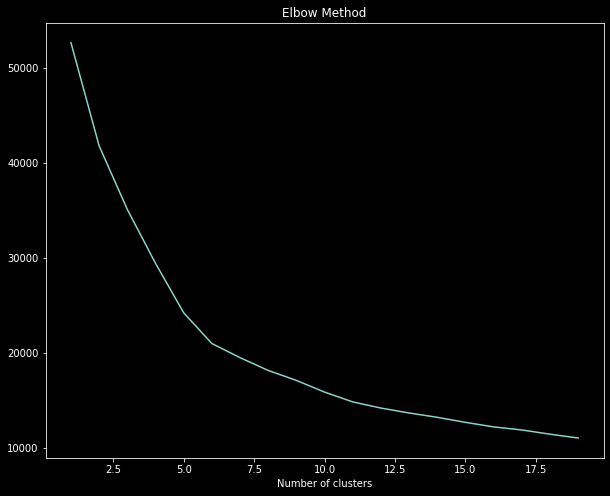

In [40]:
# choose number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scale_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [41]:
#fit kmeans algorithm
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scale_data)

KMeans(n_clusters=5, random_state=0)

In [42]:
# save kmeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [43]:
def plot_clusters(data: pd.DataFrame, feature_list: list):
    """ plot alert features means by groups based on clustering

    Args:
        data: initial dataset
        feature_list: the features for which kmeans is estimated
    """
    with open("kmeans_model.pkl", "rb") as f:
        kmeans_model = pickle.load(f)
    sc = pickle.load(open('scaler.pkl', 'rb'))
    scale_data = sc.transform(data[feature_list])
    data['cluster'] = kmeans_model.predict(scale_data)

    data_cluster = {}
    for i in np.unique(data.cluster):
        data_cluster[i] = data[data['cluster'] == i]

    feature_values = {}
    for j in feature_list:
        listt = []
        for i in range(5):
            listt.append(data_cluster[i][j].mean())
        listt.append(data[j].mean())
        feature_values[j] = listt

    groups = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', "All Data"]
    plotdata = pd.DataFrame(
        {f'{feature_list[0]}': feature_values[feature_list[0]], f'{feature_list[1]}': feature_values[feature_list[1]],
         f'{feature_list[2]}': feature_values[feature_list[2]], f'{feature_list[3]}': feature_values[feature_list[3]]},
        index = groups)

    plotdata.plot(kind = "bar")
    plt.title("Cluster Analysis")
    plt.ylabel('alert features, mean')
    axes2 = plt.twinx()
    axes2.plot(groups, feature_values['harvest_mean'], color = 'green', marker = 'o', linestyle = 'dashed',
               linewidth = 2, markersize = 12)
    axes2.set_ylabel('harvest_mean, mean')
    plt.ylim(180, 250)

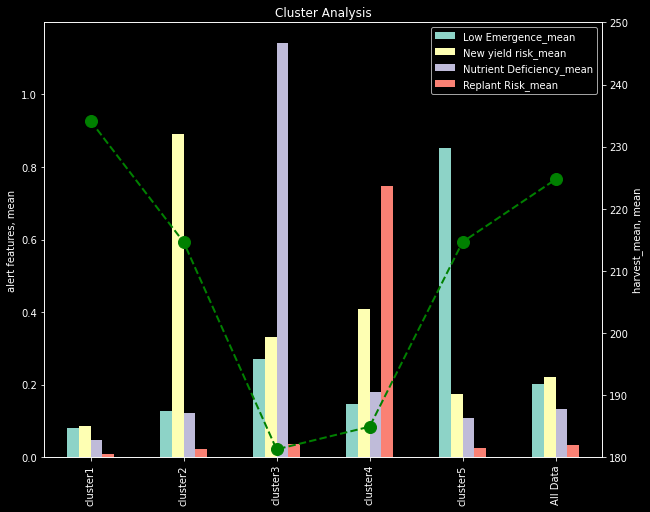

In [44]:
plot_clusters(data, ['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
       'Replant Risk_mean', 'harvest_mean'])